In [1]:
!pip install pyDrive

import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 2.8MB/s 
  Created wheel for pyDrive: filename=PyDrive-1.3.1-cp36-none-any.whl size=27435 sha256=f5d49a2e77da138d8fea3395d6ed152d69432f38e981088acc3bc7b2a3d34cec
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built pyDrive


In [2]:
import pandas as pd
download = drive.CreateFile({'id':'1BtJzvgMBovXTK0l5GS4F1wrMMJqGFeNW'})
text = download.GetContentFile("anak_kos.csv")
df = pd.read_csv("anak_kos.csv")
df.head()

,Makan,Pakaian,Kos,Total,Grup,Saku
0,200000,150000,300000,650000,1,7500000
1,2500000,500000,1000000,4000000,1,6000000
2,800000,300000,600000,1700000,1,6000000
3,1500000,500000,500000,2500000,1,3000000
4,1000000,100000,350000,1450000,1,3000000


In [3]:
df.describe()

,Makan,Pakaian,Kos,Total,Grup,Saku
count,5.600000e+01,56.000000,56.000000,5.600000e+01,56.000000,5.600000e+01
mean,7.955357e+05,161017.857143,483928.571429,1.440482e+06,0.678571,1.725000e+06
std,3.727389e+05,157892.424952,213702.670009,6.030623e+05,0.471251,1.337909e+06
min,0.000000e+00,0.000000,0.000000,3.500000e+05,0.000000,2.500000e+05
25%,6.000000e+05,17500.000000,340000.000000,1.050000e+06,0.000000,1.000000e+06
50%,8.000000e+05,100000.000000,487500.000000,1.425000e+06,1.000000,1.500000e+06
75%,9.250000e+05,262500.000000,600000.000000,1.700000e+06,1.000000,2.000000e+06
max,2.500000e+06,500000.000000,1000000.000000,4.000000e+06,1.000000,7.500000e+06


In [4]:
df['Total'].value_counts()

1700000    5
1500000    3
900000     3
1300000    3
1550000    3
1200000    3
1400000    3
1050000    3
1800000    2
2000000    2
1600000    2
1450000    2
1000000    1
2100000    1
770000     1
350000     1
650000     1
2500000    1
1130000    1
1510000    1
850000     1
940000     1
2700000    1
1900000    1
1010000    1
1225000    1
820000     1
1340000    1
465000     1
2750000    1
1507000    1
600000     1
1650000    1
4000000    1
Name: Total, dtype: int64

In [5]:
df['Grup'].value_counts()

1    38
0    18
Name: Grup, dtype: int64


Number of clusters in input data = 4

Centroids of clusters:
Kos	Total	Grup	Saku
475000	1381096	0	1425000
1000000	4000000	1	6000000
600000	1700000	1	6000000
300000	650000	1	7500000


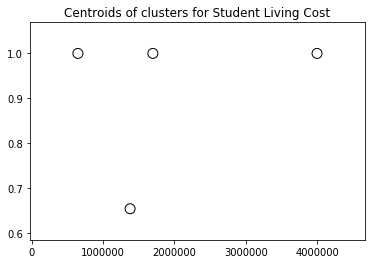

In [7]:
import csv

import numpy as np
from sklearn import cluster, covariance, manifold
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

# Load data from input file
download = drive.CreateFile({'id':'1BtJzvgMBovXTK0l5GS4F1wrMMJqGFeNW'})
text = download.GetContentFile("anak_kos.csv")
input_file = 'anak_kos.csv'
file_reader = csv.reader(open(input_file, 'r'), delimiter=',')
X = []
for count, row in enumerate(file_reader):
    if not count:
        names = row[2:]
        continue

    X.append([float(x) for x in row[2:]])

# Input data as numpy array
X = np.array(X)

# Estimating the bandwidth 
bandwidth = estimate_bandwidth(X, quantile=0.8, n_samples=len(X))

# Compute clustering with MeanShift
meanshift_estimator = MeanShift(bandwidth=bandwidth, bin_seeding=True)
meanshift_estimator.fit(X)
labels = meanshift_estimator.labels_
centroids = meanshift_estimator.cluster_centers_
num_clusters = len(np.unique(labels))

print ("\nNumber of clusters in input data =", num_clusters)

print ("\nCentroids of clusters:")
print ('\t'.join([name[:8] for name in names]))
for centroid in centroids:
    print ('\t'.join([str(int(x)) for x in centroid]))

################
# Visualizing data

centroids_total_grup = centroids[:, 1:3]

# Plot the nodes using the coordinates of our centroids_total_grup
plt.figure()
plt.scatter(centroids_total_grup[:,0], centroids_total_grup[:,1], 
        s=100, edgecolors='k', facecolors='none')

offset = 0.2
plt.xlim(centroids_total_grup[:,0].min() - offset * centroids_total_grup[:,0].ptp(),
        centroids_total_grup[:,0].max() + offset * centroids_total_grup[:,0].ptp(),)
plt.ylim(centroids_total_grup[:,1].min() - offset * centroids_total_grup[:,1].ptp(),
        centroids_total_grup[:,1].max() + offset * centroids_total_grup[:,1].ptp())

plt.title('Centroids of clusters for Student Living Cost')
plt.show()

In [34]:
from sklearn.metrics import adjusted_rand_score, silhouette_score

print("ARI : ",adjusted_rand_score(labels,meanshift_estimator.labels_))

ARI :  1.0
